<a href="https://colab.research.google.com/github/NehaNeha417/Self_project/blob/main/loan_prediction_again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [922]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [923]:
data=pd.read_csv('/content/loan_predction.csv')

In [924]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [925]:
data.shape

(614, 13)

In [926]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [927]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [928]:
# data.Gender = data.Gender.fillna(data.Gender.ffill())
# data.Dependents = data.Dependents.fillna(data.Dependents.ffill())
# data.Self_Employed = data.Self_Employed.fillna(data.Self_Employed.ffill())
# data.Credit_History = data.Credit_History.fillna(data.Credit_History.ffill())


In [929]:
# To fill tha Nan values using forward fill because these are object datatypes
# inplace = True means the data frame itself is changing
data.Gender.fillna(data.Gender.ffill(),inplace=True)
data.Dependents.fillna(data.Dependents.ffill(),inplace=True)
data.Self_Employed.fillna(data.Self_Employed.ffill(),inplace=True)
data.Credit_History.fillna(data.Credit_History.ffill(),inplace=True)
data.Married.fillna(data.Married.ffill(),inplace=True)


In [930]:
data.LoanAmount.fillna(data.LoanAmount.mean(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)


In [931]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [932]:
# to find the unique values in every column
print(data.Self_Employed.value_counts())
print(data.Dependents.value_counts())
print(data.Property_Area.value_counts())
print(data.Education.value_counts())
print(data.Gender.value_counts())
print(data.Loan_Status.value_counts())
print(data.Married.value_counts())

No     528
Yes     86
Name: Self_Employed, dtype: int64
0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Male      500
Female    114
Name: Gender, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64
Yes    400
No     214
Name: Married, dtype: int64


In [933]:
data.Gender = pd.get_dummies(data.Gender)
data.Married = pd.get_dummies(data.Married)
data.Education = pd.get_dummies(data.Education)
data.Self_Employed = pd.get_dummies(data.Self_Employed)
data.Loan_Status = pd.get_dummies(data.Loan_Status)

In [934]:
le = LabelEncoder()
data.Dependents = le.fit_transform(data.Dependents)
data.Property_Area = le.fit_transform(data.Property_Area)

In [935]:
from sklearn import preprocessing
data.CoapplicantIncome = preprocessing.scale(data.CoapplicantIncome)
data.ApplicantIncome = preprocessing.scale(data.ApplicantIncome)
data.LoanAmount = preprocessing.scale(data.LoanAmount)
data.Loan_Amount_Term = preprocessing.scale(data.Loan_Amount_Term)

In [936]:
data.shape

(614, 13)

In [937]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,1,1,0.072991,-0.554487,0.000000,0.279851,1.0,2,0
1,LP001003,0,0,1,1,1,-0.134412,-0.038732,-0.219273,0.279851,1.0,0,1
2,LP001005,0,0,0,1,0,-0.393747,-0.554487,-0.957641,0.279851,1.0,2,0
3,LP001006,0,0,0,0,1,-0.462062,0.251980,-0.314547,0.279851,1.0,2,0
4,LP001008,0,1,0,1,1,0.097728,-0.554487,-0.064454,0.279851,1.0,2,0


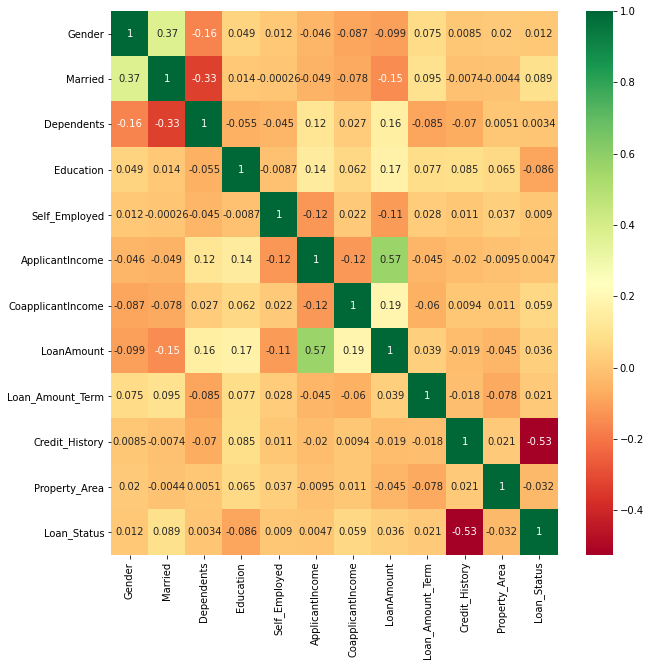

In [938]:
import seaborn as sns
c = data.corr()
top_corr_features = c.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')
#g = sns.heatmap(data.corr,annot=True)

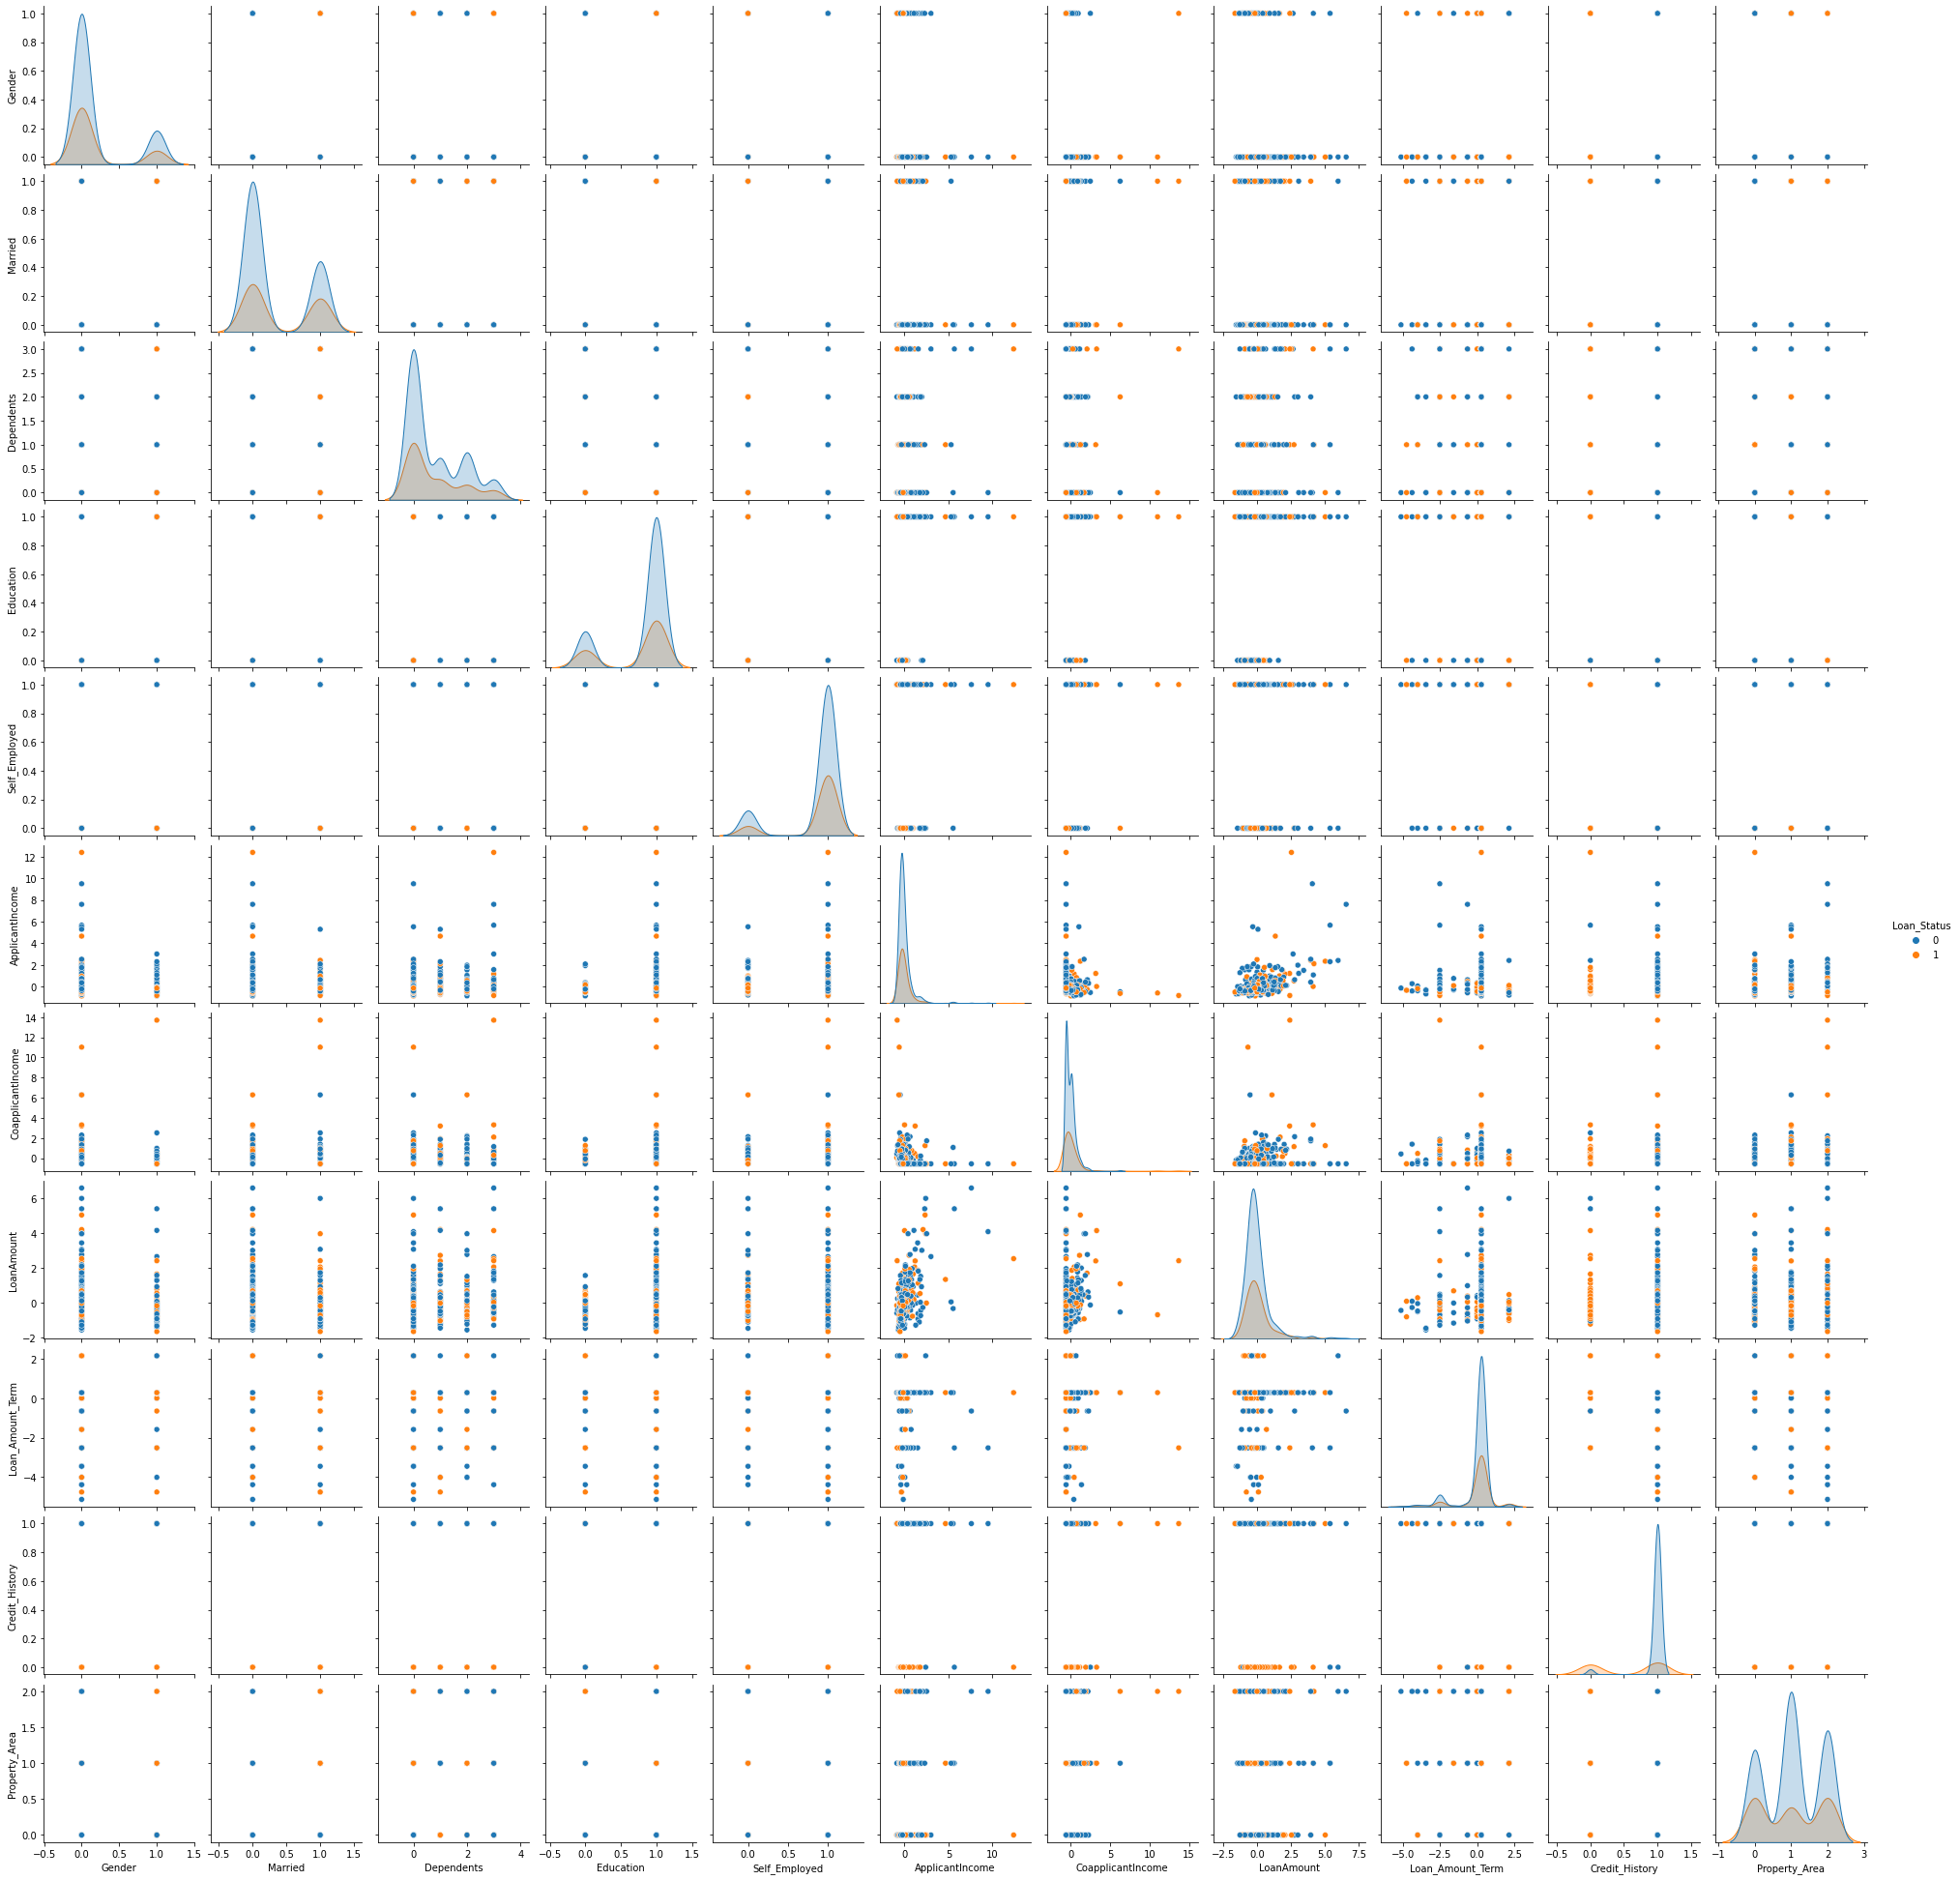

In [939]:
import seaborn as sns
sns.pairplot(data,hue='Loan_Status')

<Figure size 720x720 with 0 Axes>

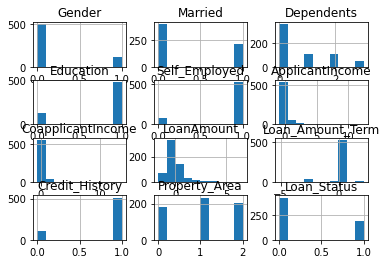

In [940]:
plt.figure(figsize=(10,10))
data.hist()
plt.show()

In [941]:
data = data.drop(columns=['ApplicantIncome','Self_Employed','Loan_ID'])

In [942]:
data.shape

(614, 10)

In [943]:
data.tail()

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,1,1,0,1,-0.554487,-0.898095,0.279851,1.0,0,0
610,0,0,3,1,-0.554487,-1.267279,-2.518655,1.0,0,0
611,0,0,1,1,-0.472404,1.269371,0.279851,1.0,2,0
612,0,0,2,1,-0.554487,0.483367,0.279851,1.0,2,0
613,1,1,0,1,-0.554487,-0.159728,0.279851,0.0,1,1


In [944]:
from sklearn.model_selection import train_test_split
x = data.drop(['Loan_Status'],axis=1)
y = data['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [945]:
x_train.shape

(491, 9)

In [946]:
x_train.head()

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,0,0,0,1,0.215042,1.412281,0.279851,1.0,1
90,0,0,0,1,0.437351,-0.183546,0.279851,1.0,1
227,0,0,2,1,0.025225,0.757277,0.279851,1.0,1
482,0,0,0,1,0.522854,-0.219273,0.279851,1.0,1
464,0,1,0,1,-0.554487,-0.576548,0.279851,0.0,1


Logistic Regression is used for the case of linear classification problem i.e; where there is no overlapping between the data points.
Whereas KNN, Decision Tree, Random Forest etc are used for non-linear classification problem when there is so much overlapping.
But Decision tree, Random Forest takes more time to train so we can use KNN, it will work better bcoz it uses euclidean distance to determine the similarity between given data points.
But if KNN doesn't work better, definitely we should go for randaom forest. decision tree, Xgboost etc.

In [947]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [948]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

In this problem, 0-Bank will give loan and 
1- Bank won't give loan
For a Good Classifier, precision should be high and Recall should also be high.
And F1 score is used to maintain a balance between precision and recall in most of the business domain and when there is uneven class distibution

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. 
An excellent model has AUC near to the 1 which means it has good measure of separability. 

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

Accuracy_score= 0.8130081300813008
[[79  1]
 [22 21]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        80
           1       0.95      0.49      0.65        43

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123

0.7558139534883721


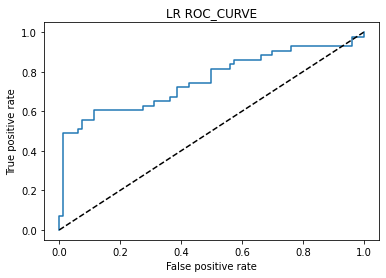

In [949]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_proba = lr.predict_proba(x_test)
y_proba = y_proba[:,1]
fper,tper,threshold = roc_curve(y_test,y_proba)
acc = accuracy_score(y_test,y_pred)
print('Accuracy_score=',acc)
print('='*40)
print(confusion_matrix(y_test,y_pred))
print('='*40)
print(classification_report(y_test,y_pred))
print('='*40)
print(roc_auc_score(y_test,y_proba))
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LR ROC_CURVE')
plt.show()

In [950]:
i =[0.0001,0.001,0.01,0.1,10]
test_score = []
for c in i:
  clf = svm.SVC(C=c) #,gamma=0.1)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  test_score.append(acc)
print(test_score)
  


[0.6504065040650406, 0.6504065040650406, 0.6504065040650406, 0.6504065040650406, 0.8048780487804879]


This means value of gamma is not affecting the model. So, choose gamma=0.1

0.8048780487804879
[[78  2]
 [22 21]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        80
           1       0.91      0.49      0.64        43

    accuracy                           0.80       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.80      0.79       123

0.7558139534883721


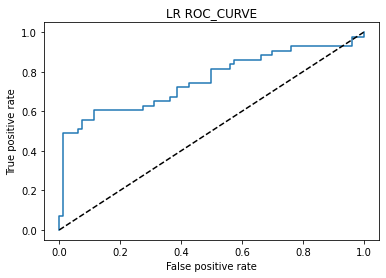

In [951]:
clf=svm.SVC(C=10)          #gamma=0.1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
print('='*40)
print(confusion_matrix(y_test,y_pred))
print('='*40)
print(classification_report(y_test,y_pred))
print('='*40)
print(roc_auc_score(y_test,y_proba))
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LR ROC_CURVE')
plt.show()


0.8130081300813008
[[79  1]
 [22 21]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        80
           1       0.95      0.49      0.65        43

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123

0.7558139534883721


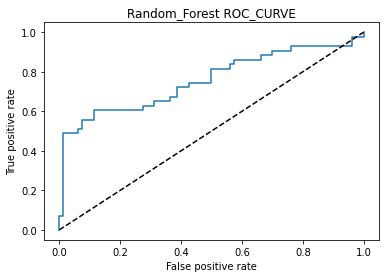

In [952]:
ran = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=5,max_features=2)
ran.fit(x_train,y_train)
y_pred= ran.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
print('='*40)
print(confusion_matrix(y_test,y_pred))
print('='*40)
print(classification_report(y_test,y_pred))
print('='*40)
print(roc_auc_score(y_test,y_proba))
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random_Forest ROC_CURVE')
plt.show()


0.8130081300813008
[[79  1]
 [22 21]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        80
           1       0.95      0.49      0.65        43

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123

0.7558139534883721


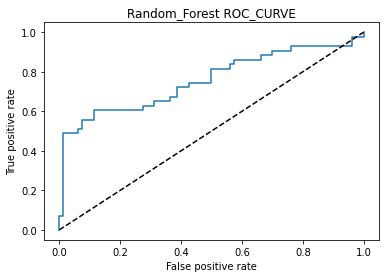

In [953]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred= ran.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
print('='*40)
print(confusion_matrix(y_test,y_pred))
print('='*40)
print(classification_report(y_test,y_pred))
print('='*40)
print(roc_auc_score(y_test,y_proba))
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random_Forest ROC_CURVE')
plt.show()


In [954]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
#VC = VotingClassifier()
lr = LogisticRegression(max_iter=50,random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=5,max_features=2,random_state=42)
Classifiers = [('Logistic Regression',lr),('K Nearest Neighbour',knn),('Decision Tree',dt)]
for clf_name,clf in Classifiers:
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  print(acc)
  print(':s',':.3f'.format(clf_name,accuracy_score(y_test,y_pred)))

0.8130081300813008
:s :.3f
0.7398373983739838
:s :.3f
0.7886178861788617
:s :.3f


0.8211382113821138
[[80  0]
 [22 21]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        80
           1       1.00      0.49      0.66        43

    accuracy                           0.82       123
   macro avg       0.89      0.74      0.77       123
weighted avg       0.86      0.82      0.80       123

0.7558139534883721


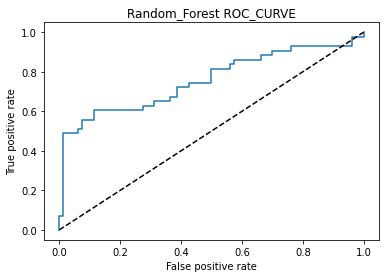

In [955]:
VC = VotingClassifier(estimators=Classifiers)
VC.fit(x_train,y_train)
y_pred = VC.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
print('='*40)
print(confusion_matrix(y_test,y_pred))
print('='*40)
print(classification_report(y_test,y_pred))
print('='*40)
print(roc_auc_score(y_test,y_proba))
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random_Forest ROC_CURVE')
plt.show()
